In [18]:
%pip install numpy
%pip install pandas
%pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install yfinance
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_1

In [19]:
start = '2012-01-01'
end = '2025-05-01'

stock = 'GOOG'

data = yf.download(stock, start=start, end=end) # Download data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [20]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2012-01-05,16.336348,16.459302,16.267433,16.413690,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2025-04-24,161.470001,161.710007,158.089996,158.524994,30787500
2025-04-25,163.850006,168.240005,163.000000,167.100006,35148100


In [21]:
data.reset_index(inplace=True) # reset the index

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [22]:
ma_100_days = data.Close.rolling(100).mean() # 100 days moving average

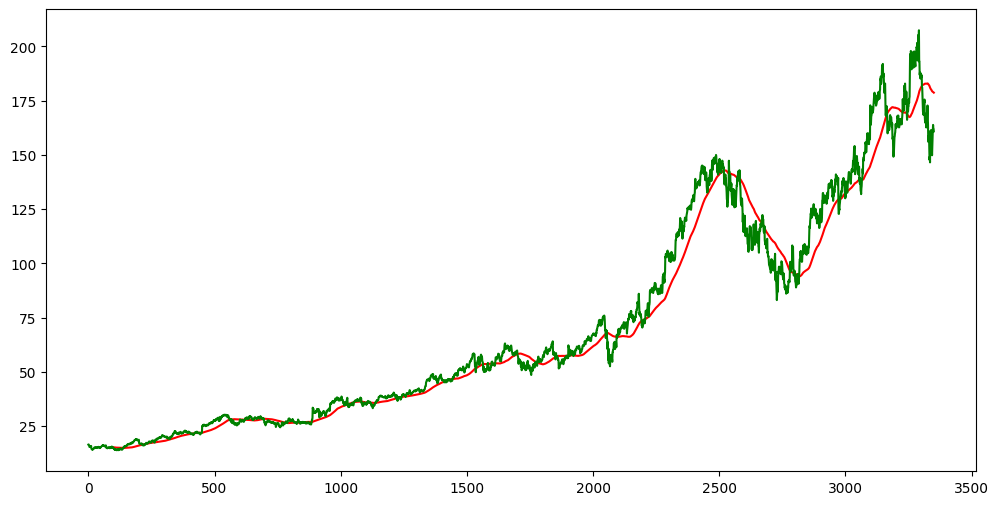

In [23]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [24]:
ma_200_days = data.Close.rolling(200).mean() # 200 days moving average

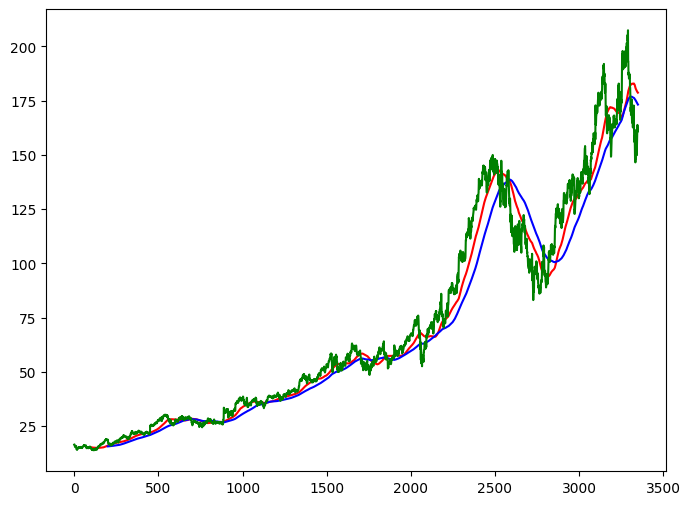

In [25]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [26]:
data.dropna(inplace=True) # drop missing values

In [27]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)]) # train data
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)]) # test data

In [28]:
data_train.shape[0]

2680

In [29]:
data_test.shape[0]

671

In [32]:
%pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler(feature_range=(0,1)) # scale the data

  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
data_train_scaled = scaller.fit_transform(data_train) # scale the train data

In [34]:
x = []
y = []
for i in range(100, data_train_scaled.shape[0]):
  x.append(data_train_scaled[i-100:i])
  y.append(data_train_scaled[i, 0])

In [35]:
x, y = np.array(x), np.array(y)

In [39]:
%pip install tensorflow pandas
%pip install tenserflow
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

  Using cached tensorflow-2.19.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp311-cp311-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cach

In [40]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0621
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0051
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0051
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0045
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0042
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0036
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0035
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0042
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0036
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0034
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0032
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0030
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0032
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0031
Epoch 15/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0029
Epoc

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
pas_100_dasys = data_train.tail(100) # last 100 days

In [45]:
data_test = pd.concat([pas_100_dasys, data_test], ignore_index=True) # concatenate the data

In [46]:
data_test_scaled = scaller.fit_transform(data_test) # scale the test data

In [47]:
x = []
y = []
for i in range(100, data_test_scaled.shape[0]):
  x.append(data_test_scaled[i-100:i])
  y.append(data_test_scaled[i, 0])

In [48]:
x, y = np.array(x), np.array(y)

In [49]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [50]:
scale = 1/scaller.scale_

In [52]:
y_predict = y_predict * scale # scale the prediction

In [53]:
y = y * scale # scale the test data

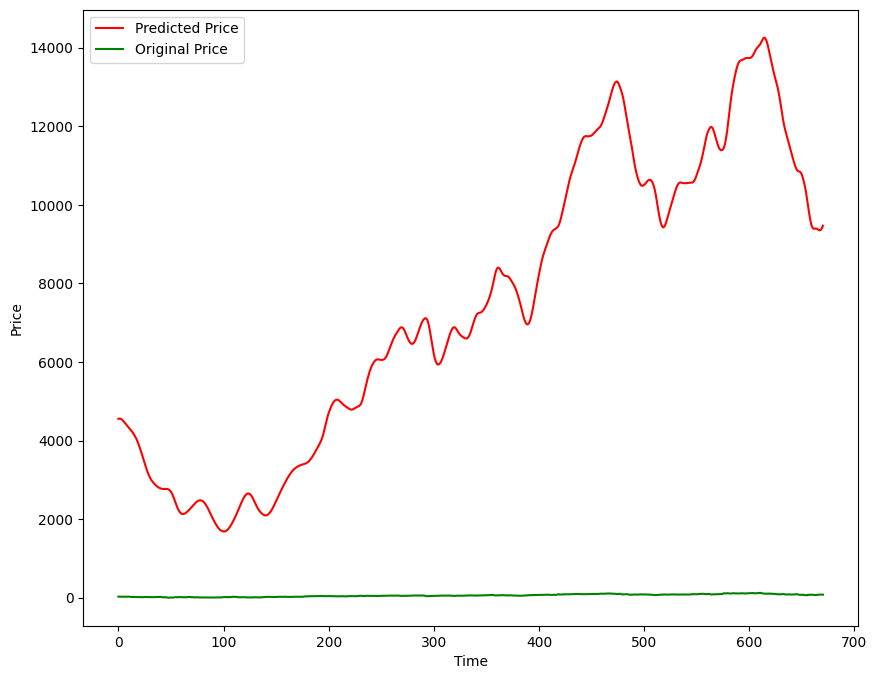

In [54]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
import os

print("Saving model to:", os.getcwd())
model.save('Stock Predictions Model.keras')

Saving model to: /Users/osadici.darius/Documents/ai-stock-predictor/AIStockPredictorHub
